In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
residents = pd.read_csv('la_residents_data.csv')

In [3]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [4]:
#Renaming & combining some labels from EDUC_DESC
education = {
0:'N/A or no schooling',
1:'Less than high school',
2:'Less than high school',
3:'Some high school',
4:'Some high school',
5:'Some high school',
6:'HS graduate',
7:'Some college',
8:'Some college',
9:'Some college',
10:"College graduate",
11:'Graduate school'}

In [5]:
#Applying combined education labels to residents & outmigrators dataframes
residents['EDUC_DESC'] = residents.EDUC.map(education)
outmigrators['EDUC_DESC'] = outmigrators.EDUC.map(education)

---

#### Resident & Out Migrator Education Breakdown:

In [6]:
#Establishing one list of education levels to use for both resident & out migration data extraction
education_levels = ['Graduate school',
                    'College graduate', 
                    'Some college',
                    'HS graduate',
                    'Some high school',
                    'Less than high school',
                    'N/A or no schooling']

(1) Residents:

In [7]:
#Calculating annual resident counts for each education level
res_educ = pd.DataFrame()
for year in range(2006,2018):
    df = residents[residents.YEAR == year]
    counts = {}
    
    for level in education_levels:
        count = df.PERWT[df.EDUC_DESC == level].sum()
        counts[level] = count
    
    #Creating df from values stored in counts dict
    educ_df = pd.DataFrame.from_dict(counts, orient='index')
    educ_df = educ_df.reset_index().rename({'index':'Education Level', 0:'Resident Count'}, axis=1)
    educ_df['Year'] = np.full(len(educ_df), year)
    
    res_educ = pd.concat([res_educ, educ_df])

In [8]:
res_educ.head(7)

,Education Level,Resident Count,Year
0,Graduate school,822181,2006
1,College graduate,1687468,2006
2,Some college,2049409,2006
3,HS graduate,3116050,2006
4,Some high school,1223917,2006
5,Less than high school,2834265,2006
6,N/A or no schooling,1216904,2006


(2) Out Migrators:

In [9]:
#Calculating annual out migrator counts for each education level
out_educ = pd.DataFrame()
for year in range(2006,2018):
    df = outmigrators[outmigrators.YEAR == year]
    counts = {}
    
    for level in education_levels:
        count = df.PERWT[df.EDUC_DESC == level].sum()
        counts[level] = count
    
    #Creating df from values stored in counts dict
    educ_df = pd.DataFrame.from_dict(counts, orient='index')
    educ_df = educ_df.reset_index().rename({'index':'Education Level', 0:'Out Migrator Count'}, axis=1)
    educ_df['Year'] = np.full(len(educ_df), year)
    
    out_educ = pd.concat([out_educ, educ_df])

In [10]:
out_educ.head()

,Education Level,Out Migrator Count,Year
0,Graduate school,33872,2006
1,College graduate,63256,2006
2,Some college,80117,2006
3,HS graduate,129532,2006
4,Some high school,44299,2006


#### Out Migration % From Each Education Level:

In [11]:
combined = out_educ.copy()
combined['Resident Count'] = res_educ['Resident Count']
combined['Out Migrator %'] = combined['Out Migrator Count'] / (combined['Out Migrator Count'] + combined['Resident Count'])

In [12]:
combined.head(7)

,Education Level,Out Migrator Count,Year,Resident Count,Out Migrator %
0,Graduate school,33872,2006,822181,0.039568
1,College graduate,63256,2006,1687468,0.036131
2,Some college,80117,2006,2049409,0.037622
3,HS graduate,129532,2006,3116050,0.039910
4,Some high school,44299,2006,1223917,0.034930
5,Less than high school,84334,2006,2834265,0.028895
6,N/A or no schooling,44514,2006,1216904,0.035289


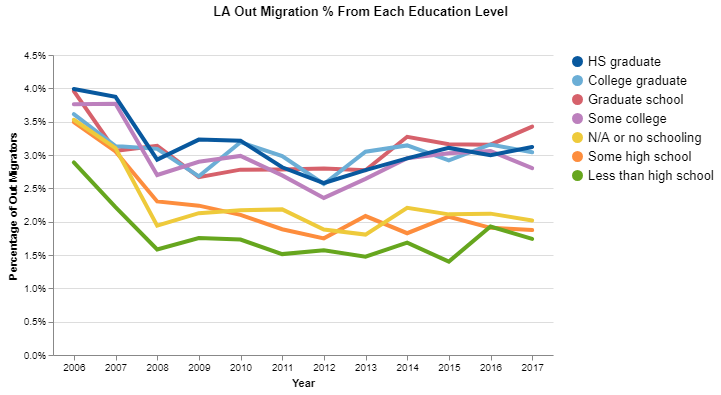

In [13]:
#Plotting via Altair
title=alt.TitleParams(text='LA Out Migration % From Each Education Level', anchor='middle', offset=30)
education = alt.Chart(combined).configure_axis(labelAngle=0).mark_line(strokeWidth=4, strokeCap='round').encode(
    x=alt.X('Year:O', 
            title='Year', 
            axis=alt.Axis(labelFlush=False, grid=False)), 
    y=alt.Y('Out Migrator %', 
            title='Percentage of Out Migrators',
            axis=alt.Axis(format='%'),
            scale=alt.Scale(domain=(0,.045))), 
    color=alt.Color('Education Level', 
                    title=None, 
                    scale=alt.Scale(domain=['HS graduate', 'College graduate', 'Graduate school', 'Some college', 'N/A or no schooling', 
                                            'Some high school', 'Less than high school'],
                                    range=['#08589e', '#6baed6', '#d6616b', '#bc80bd', '#eeca3b', '#fd8d3d', '#66a61e']))
).properties(width=500, title=title, background='white'
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

education

In [14]:
education.save('educ_outmigration_percentage.png', scale_factor=3)